In [1]:
import pandas as pd

In [2]:
fish = pd.read_csv("./data/05_생선_분류_데이터셋.csv")
fish.info()
fish.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


<Axes: >

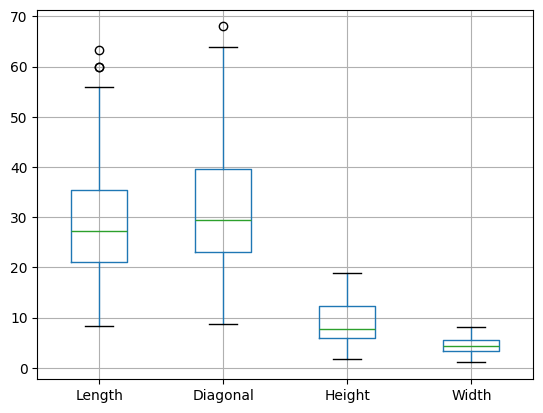

In [3]:
tmp = fish[["Species", "Length", "Diagonal", "Height", "Width"]].copy()
tmp.boxplot()

In [4]:
fish["Species"].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [5]:
species_dic = {
    "Perch" : 0, 
    "Bream" : 1, 
    "Roach" : 2, 
    "Pike" : 3, 
    "Smelt" : 4, 
    "Parkki" : 5, 
    "Whitefish" : 6, 
}
fish["Species"] = fish["Species"].map(species_dic)
fish["Species"].value_counts()

Species
0    56
1    35
2    20
3    17
4    14
5    11
6     6
Name: count, dtype: int64

In [6]:
X = fish.iloc[:,1:]
y = fish["Species"]
X.shape, y.shape

((159, 5), (159,))

In [7]:
from scipy.stats import spearmanr
    
for col_name in X.columns:
    tmp = spearmanr(X[col_name], y)
    print(f"변수명         : {col_name}")
    print(f"상관계수 계수값 : {tmp[0]:.3f}")
    print(f"      p-value : {tmp[1]:.3f}")
    print("-------------------------")

변수명         : Weight
상관계수 계수값 : -0.171
      p-value : 0.031
-------------------------
변수명         : Length
상관계수 계수값 : -0.157
      p-value : 0.048
-------------------------
변수명         : Diagonal
상관계수 계수값 : -0.115
      p-value : 0.149
-------------------------
변수명         : Height
상관계수 계수값 : -0.109
      p-value : 0.173
-------------------------
변수명         : Width
상관계수 계수값 : -0.277
      p-value : 0.000
-------------------------


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [9]:
# X = X[["Weight", "Length", "Width"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [11]:
rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
hgb = HistGradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

model_list = [rf, et, gb, hgb, xgb]

In [12]:
for model in model_list:
    model_name = model.__class__.__name__
    model.fit(X_train_scaled, y_train)
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)
    print(model_name)
    print(recall_score(y_test, test_pred, average="macro"))
    print(train_acc, test_acc, train_acc - test_acc)

RandomForestClassifier
0.6825396825396826
1.0 0.8125 0.1875
ExtraTreesClassifier
0.8253968253968254
1.0 0.84375 0.15625
GradientBoostingClassifier
0.8095238095238094
1.0 0.8125 0.1875
HistGradientBoostingClassifier
0.7936507936507936
0.9448818897637795 0.78125 0.16363188976377951
XGBClassifier
0.619047619047619
1.0 0.75 0.25


In [13]:
"""
문자열 그대로 했을때
RandomForestClassifier
1.0 0.775 0.22499999999999998
ExtraTreesClassifier
1.0 0.825 0.17500000000000004
GradientBoostingClassifier
1.0 0.775 0.22499999999999998
HistGradientBoostingClassifier
0.9495798319327731 0.725 0.2245798319327731
"""

'\n문자열 그대로 했을때\nRandomForestClassifier\n1.0 0.775 0.22499999999999998\nExtraTreesClassifier\n1.0 0.825 0.17500000000000004\nGradientBoostingClassifier\n1.0 0.775 0.22499999999999998\nHistGradientBoostingClassifier\n0.9495798319327731 0.725 0.2245798319327731\n'

In [14]:
"""
문자열 숫자로 바꾸고 했을때
RandomForestClassifier
1.0 0.775 0.22499999999999998
ExtraTreesClassifier
1.0 0.825 0.17500000000000004
GradientBoostingClassifier
1.0 0.775 0.22499999999999998
HistGradientBoostingClassifier
0.9495798319327731 0.725 0.2245798319327731
XGBClassifier
1.0 0.775 0.22499999999999998
"""

'\n문자열 숫자로 바꾸고 했을때\nRandomForestClassifier\n1.0 0.775 0.22499999999999998\nExtraTreesClassifier\n1.0 0.825 0.17500000000000004\nGradientBoostingClassifier\n1.0 0.775 0.22499999999999998\nHistGradientBoostingClassifier\n0.9495798319327731 0.725 0.2245798319327731\nXGBClassifier\n1.0 0.775 0.22499999999999998\n'

In [15]:
"""
문자열 숫자로 바꾸고
p-value 가 0.05 보다 큰 변수 제거 했을때
RandomForestClassifier
1.0 0.65 0.35
ExtraTreesClassifier
1.0 0.725 0.275
GradientBoostingClassifier
1.0 0.7 0.30000000000000004
HistGradientBoostingClassifier
0.8907563025210085 0.625 0.26575630252100846
XGBClassifier
1.0 0.75 0.25
"""

'\n문자열 숫자로 바꾸고\np-value 가 0.05 보다 큰 변수 제거 했을때\nRandomForestClassifier\n1.0 0.65 0.35\nExtraTreesClassifier\n1.0 0.725 0.275\nGradientBoostingClassifier\n1.0 0.7 0.30000000000000004\nHistGradientBoostingClassifier\n0.8907563025210085 0.625 0.26575630252100846\nXGBClassifier\n1.0 0.75 0.25\n'

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
# 트리의 갯수 범위 지정
n_estimators_list = list(range(20, 201, 20))

# 트리가 밑으로 뻗어 나가는 최대 깊이 지정 (None은 깊이 제한을 주지 않겠다는 의미. 즉, 훈련이 진행될 때까지 계속해서 깊게 파고 내려감)
max_depth_list = [None, 3,5, 7, 10]

eta_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

min_samples_split_list = [2,3,4,5]

In [18]:
max_n_est = 0
max_max_depth = 0
min_diff = 1

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for min_samples_split in min_samples_split_list:
            model = ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
            model_name = model.__class__.__name__
            model.fit(X_train_scaled, y_train)
            train_pred = model.predict(X_train_scaled)
            test_pred = model.predict(X_test_scaled)
            train_acc = model.score(X_train_scaled, y_train)
            test_acc = model.score(X_test_scaled, y_test)
            diff = train_acc - test_acc
            if (min_diff > diff and test_acc > 0.8):
                min_diff = diff
                max_n_est = n_estimators
                max_max_depthth = max_depth
                print(n_estimators, max_max_depth, min_samples_split)
                print(train_acc, test_acc, train_acc - test_acc)
                print("-----------------------------------------")

20 0 2
1.0 0.8125 0.1875
-----------------------------------------
20 0 4
1.0 0.84375 0.15625
-----------------------------------------
20 0 5
0.9921259842519685 0.84375 0.14837598425196852
-----------------------------------------
20 0 3
0.7244094488188977 0.8125 -0.08809055118110232
-----------------------------------------
20 0 4
0.6929133858267716 0.8125 -0.11958661417322836
-----------------------------------------


In [19]:
min_diff, max_n_est

(-0.11958661417322836, 20)

In [20]:
model = ExtraTreesClassifier(n_estimators=60, max_depth=5)
model_name = model.__class__.__name__
model.fit(X_train_scaled, y_train)
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)
train_acc = model.score(X_train_scaled, y_train)
test_acc = model.score(X_test_scaled, y_test)
print(model_name)
print(recall_score(y_test, test_pred, average="macro"))
print(train_acc, test_acc, train_acc - test_acc)

ExtraTreesClassifier
0.6666666666666666
0.8582677165354331 0.84375 0.0145177165354331


In [21]:
p.plot(data['Usage_kWh'].sort_values().reset_index(drop=True), marker='o', linestyle='-')

NameError: name 'p' is not defined